In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import bbi
import bioframe as bf
import glob
from spt5_project_lib import ReaderFunctions
from spt5_project_lib import PeaksManipulation

In [4]:
#### A way to use externel fonts in matplotlib without installing it
from matplotlib import font_manager
font_dirs = ['/users/ankit.gupta/.fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
#### A way to use externel fonts in matplotlib without installing it

mpl.rcParams['font.family'] = 'Nunito'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2

In [5]:
atacSeqFiles = glob.glob("/groups/goloborodko/projects/ankit/spt5_project/atac-seq/macs2_peaks/*.xls")
atacSeqPeaks = {i.split("/")[-1].split(".")[0]:ReaderFunctions.GetMacs2Peaks(i,getBed=False) for i in atacSeqFiles}
chroms = [i for i in list(pd.unique(atacSeqPeaks["WT_R1"].chrom)) if "random" not in i and "M" not in i]
atacSeqPeaks = {i:atacSeqPeaks[i].loc[atacSeqPeaks[i].chrom.isin(chroms)] for i,j in atacSeqPeaks.items()}

In [6]:
atacSeqPeaks["WT_R1"]

,chrom,start,end,length,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
0,chr1,4561712,4561930,219,7.18,3.77748,3.18315,1.70621,WT_R1.mLb.clN_peak_1
1,chr1,4590892,4591073,182,11.05,7.11385,4.69000,4.88139,WT_R1.mLb.clN_peak_2
2,chr1,4661500,4662067,568,16.82,13.40980,6.93445,11.02600,WT_R1.mLb.clN_peak_3
3,chr1,4758508,4758704,197,7.49,4.01724,3.30334,1.93032,WT_R1.mLb.clN_peak_4
4,chr1,4764992,4765494,503,19.51,12.01710,5.74635,9.64620,WT_R1.mLb.clN_peak_5
...,...,...,...,...,...,...,...,...,...
54451,chrX,166428905,166429590,686,272.41,181.61300,7.98204,178.15000,WT_R1.mLb.clN_peak_54534
54452,chrX,166434968,166436424,1457,275.66,167.85500,7.07864,164.43400,WT_R1.mLb.clN_peak_54535
54453,chrX,166443101,166444081,981,16.34,6.27362,3.41463,4.09739,WT_R1.mLb.clN_peak_54536
54454,chrX,166446616,166446962,347,18.39,10.21940,4.88789,7.92237,WT_R1.mLb.clN_peak_54537


In [7]:
h3k27acFiles = glob.glob("/groups/goloborodko/projects/ankit/spt5_project/h3k27ac_chip_seq/*.h3k27ac/*.xls")
h3k27acPeaks = {i.split("/")[-1][:5]:ReaderFunctions.GetMacs2Peaks(i,getBed=False) for i in h3k27acFiles}
chroms = [i for i in list(pd.unique(h3k27acPeaks["WT.R1"].chrom)) if "random" not in i and "M" not in i]
h3k27acPeaks = {i:h3k27acPeaks[i].loc[h3k27acPeaks[i].chrom.isin(chroms)] for i,j in h3k27acPeaks.items()}

In [8]:
h3k27acPeaks["WT.R1"]

,chrom,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
0,chr1,4774636,4774877,242,4774836,9.27,5.14806,3.95074,3.07199,/groups/goloborodko/projects/ankit/spt5_projec...
1,chr1,4775002,4776317,1316,4775621,31.71,29.56840,12.58423,26.48586,/groups/goloborodko/projects/ankit/spt5_projec...
2,chr1,4797469,4798597,1129,4798143,30.73,28.26646,12.20886,25.23103,/groups/goloborodko/projects/ankit/spt5_projec...
3,chr1,4847093,4848675,1583,4848108,39.03,36.71734,13.34204,33.36855,/groups/goloborodko/projects/ankit/spt5_projec...
4,chr1,4848753,4849295,543,4849067,19.03,14.96841,7.70443,12.43587,/groups/goloborodko/projects/ankit/spt5_projec...
...,...,...,...,...,...,...,...,...,...,...
29784,chrX,166425169,166425448,280,166425341,18.05,7.28745,3.80992,5.10654,/groups/goloborodko/projects/ankit/spt5_projec...
29785,chrX,166427987,166429142,1156,166428788,37.07,23.11490,7.44521,20.28606,/groups/goloborodko/projects/ankit/spt5_projec...
29786,chrX,166429361,166429679,319,166429566,23.90,10.55724,4.77921,8.22636,/groups/goloborodko/projects/ankit/spt5_projec...
29787,chrX,166434739,166436012,1274,166435689,53.17,40.55651,10.83462,37.04971,/groups/goloborodko/projects/ankit/spt5_projec...


In [9]:
for i in h3k27acPeaks.keys():
    h3k27acPeaks[i]["start"] = h3k27acPeaks[i]["abs_summit"] - 500
    h3k27acPeaks[i]["end"] = h3k27acPeaks[i]["abs_summit"] + 500

In [10]:
h3k27acPeaks["WT.R1"]

,chrom,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
0,chr1,4774336,4775336,242,4774836,9.27,5.14806,3.95074,3.07199,/groups/goloborodko/projects/ankit/spt5_projec...
1,chr1,4775121,4776121,1316,4775621,31.71,29.56840,12.58423,26.48586,/groups/goloborodko/projects/ankit/spt5_projec...
2,chr1,4797643,4798643,1129,4798143,30.73,28.26646,12.20886,25.23103,/groups/goloborodko/projects/ankit/spt5_projec...
3,chr1,4847608,4848608,1583,4848108,39.03,36.71734,13.34204,33.36855,/groups/goloborodko/projects/ankit/spt5_projec...
4,chr1,4848567,4849567,543,4849067,19.03,14.96841,7.70443,12.43587,/groups/goloborodko/projects/ankit/spt5_projec...
...,...,...,...,...,...,...,...,...,...,...
29784,chrX,166424841,166425841,280,166425341,18.05,7.28745,3.80992,5.10654,/groups/goloborodko/projects/ankit/spt5_projec...
29785,chrX,166428288,166429288,1156,166428788,37.07,23.11490,7.44521,20.28606,/groups/goloborodko/projects/ankit/spt5_projec...
29786,chrX,166429066,166430066,319,166429566,23.90,10.55724,4.77921,8.22636,/groups/goloborodko/projects/ankit/spt5_projec...
29787,chrX,166435189,166436189,1274,166435689,53.17,40.55651,10.83462,37.04971,/groups/goloborodko/projects/ankit/spt5_projec...


In [11]:
bf.closest(h3k27acPeaks["WT.R1"],atacSeqPeaks["WT_R1"]).query("distance < 100",engine="python")

,chrom,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name,chrom_,start_,end_,length_,pileup_,-log10(pvalue)_,fold_enrichment_,-log10(qvalue)_,name_,distance
0,chr1,4774336,4775336,242,4774836,9.27,5.14806,3.95074,3.07199,/groups/goloborodko/projects/ankit/spt5_projec...,chr1,4775371,4776309,939,41.84,29.674,7.8546,27.0768,WT_R1.mLb.clN_peak_7,35
1,chr1,4775121,4776121,1316,4775621,31.71,29.56840,12.58423,26.48586,/groups/goloborodko/projects/ankit/spt5_projec...,chr1,4775371,4776309,939,41.84,29.674,7.8546,27.0768,WT_R1.mLb.clN_peak_7,0
2,chr1,4797643,4798643,1129,4798143,30.73,28.26646,12.20886,25.23103,/groups/goloborodko/projects/ankit/spt5_projec...,chr1,4797591,4798274,684,72.64,54.0057,9.925,51.1419,WT_R1.mLb.clN_peak_8,0
3,chr1,4847608,4848608,1583,4848108,39.03,36.71734,13.34204,33.36855,/groups/goloborodko/projects/ankit/spt5_projec...,chr1,4847497,4848759,1263,70.59,38.1557,5.72318,35.5063,WT_R1.mLb.clN_peak_9,0
4,chr1,4848567,4849567,543,4849067,19.03,14.96841,7.70443,12.43587,/groups/goloborodko/projects/ankit/spt5_projec...,chr1,4847497,4848759,1263,70.59,38.1557,5.72318,35.5063,WT_R1.mLb.clN_peak_9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29784,chrX,166424841,166425841,280,166425341,18.05,7.28745,3.80992,5.10654,/groups/goloborodko/projects/ankit/spt5_projec...,chrX,166424779,166425145,367,75.64,13.5779,2.5821,11.1698,WT_R1.mLb.clN_peak_54533,0
29785,chrX,166428288,166429288,1156,166428788,37.07,23.11490,7.44521,20.28606,/groups/goloborodko/projects/ankit/spt5_projec...,chrX,166428905,166429590,686,272.41,181.613,7.98204,178.15,WT_R1.mLb.clN_peak_54534,0
29786,chrX,166429066,166430066,319,166429566,23.90,10.55724,4.77921,8.22636,/groups/goloborodko/projects/ankit/spt5_projec...,chrX,166428905,166429590,686,272.41,181.613,7.98204,178.15,WT_R1.mLb.clN_peak_54534,0
29787,chrX,166435189,166436189,1274,166435689,53.17,40.55651,10.83462,37.04971,/groups/goloborodko/projects/ankit/spt5_projec...,chrX,166434968,166436424,1457,275.66,167.855,7.07864,164.434,WT_R1.mLb.clN_peak_54535,0


In [12]:
h3k27acPeaks["WT"] = bf.merge(pd.concat((h3k27acPeaks["WT.R1"],h3k27acPeaks["WT.R2"])))
h3k27acPeaks["KO"] = bf.merge(pd.concat((h3k27acPeaks["KO.R1"],h3k27acPeaks["KO.R2"])))

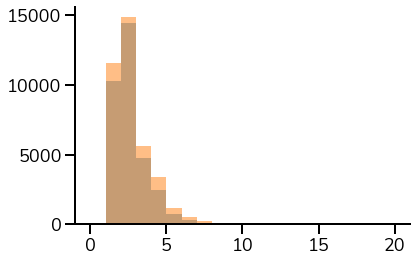

In [13]:
fig, ax = plt.subplots()
ax.hist(h3k27acPeaks["WT"]["n_intervals"],bins=20,alpha=0.5,range=(0,20));
ax.hist(h3k27acPeaks["KO"]["n_intervals"],bins=20,alpha=0.5,range=(0,20));

In [14]:
h3k27acPeaks["WTKO"] = bf.merge(pd.concat((h3k27acPeaks["WT"],h3k27acPeaks["KO"])))

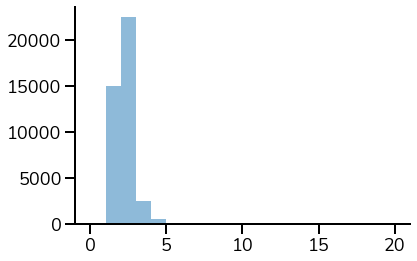

In [15]:
fig, ax = plt.subplots()
ax.hist(h3k27acPeaks["WTKO"]["n_intervals"],bins=20,alpha=0.5,range=(0,20));

In [16]:
atacSeqPeaks["WT"] = bf.merge(pd.concat((atacSeqPeaks["WT_R1"],atacSeqPeaks["WT_R2"])))
atacSeqPeaks["KO"] = bf.merge(pd.concat((atacSeqPeaks["KO_R1"],atacSeqPeaks["KO_R2"])))

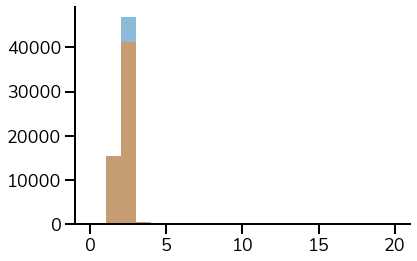

In [17]:
fig, ax = plt.subplots()
ax.hist(atacSeqPeaks["WT"]["n_intervals"],bins=20,alpha=0.5,range=(0,20));
ax.hist(atacSeqPeaks["KO"]["n_intervals"],bins=20,alpha=0.5,range=(0,20));

In [18]:
atacSeqPeaks["WTKO"] = bf.merge(pd.concat((atacSeqPeaks["WT"],atacSeqPeaks["KO"])))

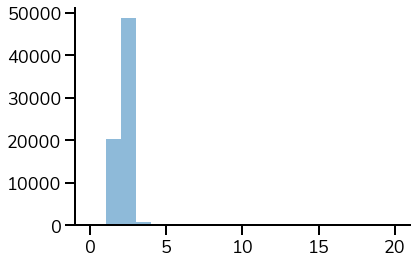

In [19]:
fig, ax = plt.subplots()
ax.hist(atacSeqPeaks["WTKO"]["n_intervals"],bins=20,alpha=0.5,range=(0,20));

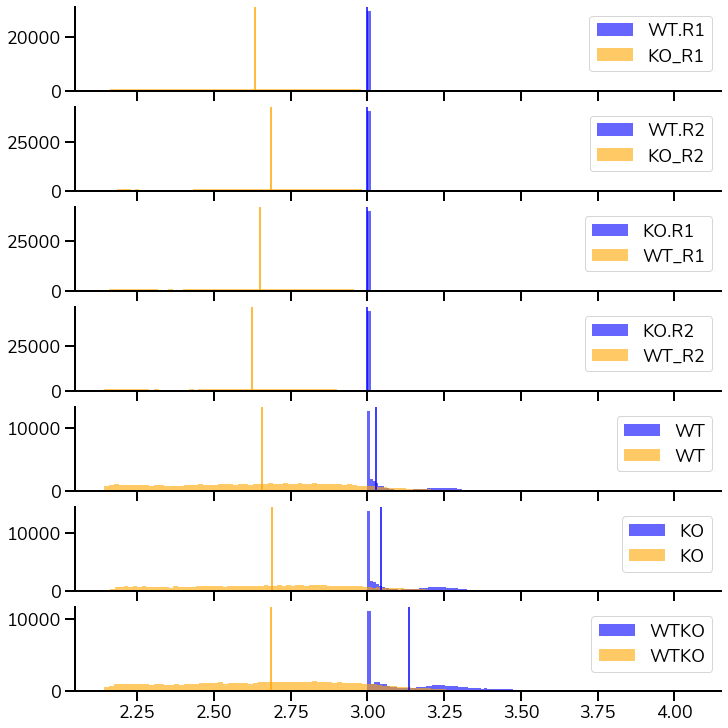

In [20]:
fig,ax = plt.subplots(len(h3k27acPeaks.keys()),figsize=(10,10),sharex=True,sharey=False,constrained_layout=True)
for ic,i in enumerate(h3k27acPeaks.keys()):
    x = np.log10(h3k27acPeaks[i]["end"]-h3k27acPeaks[i]["start"])
    ax[ic].hist(x,bins=100,alpha=0.6,label=i,density=False,color="b")
    ax[ic].axvline(np.median(x),c="b")
    ax[ic].legend()

for ic,i in enumerate(atacSeqPeaks.keys()):
    x = np.log10(atacSeqPeaks[i]["end"]-atacSeqPeaks[i]["start"])
    ax[ic].hist(x,bins=100,alpha=0.6,label=i,density=False,color='orange')
    ax[ic].axvline(np.median(x),c='orange')
    ax[ic].legend()

In [21]:
h3k27acPeaks["WT.R2"].query("length > 10000")

,chrom,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
306,chr1,38720260,38721260,10765,38720760,65.0,71.04481,20.60858,67.43793,/groups/goloborodko/projects/ankit/spt5_projec...
865,chr1,80618640,80619640,13519,80619140,72.0,78.73943,21.38005,74.94321,/groups/goloborodko/projects/ankit/spt5_projec...
994,chr1,88161044,88162044,14077,88161544,69.0,72.53688,19.63370,68.89363,/groups/goloborodko/projects/ankit/spt5_projec...
1235,chr1,108041519,108042519,10191,108042019,75.0,81.51086,21.42756,77.66894,/groups/goloborodko/projects/ankit/spt5_projec...
3368,chr10,53724765,53725765,14761,53725265,89.0,108.25453,28.10260,103.63807,/groups/goloborodko/projects/ankit/spt5_projec...
...,...,...,...,...,...,...,...,...,...,...
37930,chr9,32347912,32348912,12549,32348412,101.0,127.95166,31.84962,122.70387,/groups/goloborodko/projects/ankit/spt5_projec...
38308,chr9,51022140,51023140,19527,51022640,118.0,156.88655,37.15789,150.51431,/groups/goloborodko/projects/ankit/spt5_projec...
38832,chr9,70090959,70091959,10782,70091459,68.0,75.51410,21.54533,71.79705,/groups/goloborodko/projects/ankit/spt5_projec...
39308,chr9,107214461,107215461,21191,107214961,87.0,105.03650,27.47810,100.51185,/groups/goloborodko/projects/ankit/spt5_projec...


In [22]:
overlappingPeaks = bf.overlap(h3k27acPeaks["WTKO"],atacSeqPeaks["WTKO"],how="inner")

In [23]:
overlappingPeaks

,chrom,start,end,n_intervals,chrom_,start_,end_,n_intervals_
0,chr18,3280405,3281911,2,chr18,3280504,3281984,2
1,chr18,3293018,3294018,1,chr18,3293127,3293461,1
2,chr18,3336451,3338481,3,chr18,3336732,3338344,2
3,chr18,3382606,3383613,2,chr18,3382716,3384081,2
4,chr18,3506864,3508661,2,chr18,3507243,3508179,2
...,...,...,...,...,...,...,...,...
32182,chr15,101114081,101115108,2,chr15,101113754,101115067,2
32183,chr15,102033632,102034788,2,chr15,102033545,102034743,2
32184,chr15,102064316,102065316,1,chr15,102064198,102064555,1
32185,chr15,102236499,102237555,2,chr15,102235751,102237321,2


In [24]:
overlappingPeaks.query("n_intervals > 1 & n_intervals_ > 1",engine="python")

,chrom,start,end,n_intervals,chrom_,start_,end_,n_intervals_
0,chr18,3280405,3281911,2,chr18,3280504,3281984,2
2,chr18,3336451,3338481,3,chr18,3336732,3338344,2
3,chr18,3382606,3383613,2,chr18,3382716,3384081,2
4,chr18,3506864,3508661,2,chr18,3507243,3508179,2
7,chr18,4288980,4292851,3,chr18,4291474,4291968,2
...,...,...,...,...,...,...,...,...
32181,chr15,101054349,101055413,2,chr15,101053542,101055272,3
32182,chr15,101114081,101115108,2,chr15,101113754,101115067,2
32183,chr15,102033632,102034788,2,chr15,102033545,102034743,2
32185,chr15,102236499,102237555,2,chr15,102235751,102237321,2


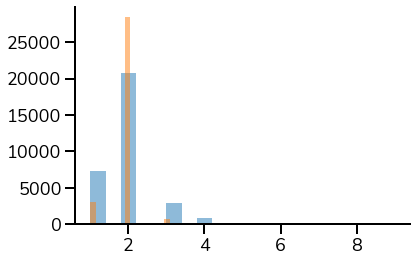

In [25]:
fig, ax = plt.subplots()
ax.hist(overlappingPeaks["n_intervals"],bins=20,alpha=0.5);
ax.hist(overlappingPeaks["n_intervals_"],bins=20,alpha=0.5);

---

In [26]:
selectedPeaks = overlappingPeaks[["chrom","start","end"]].copy()
selectedPeaks["length"] = selectedPeaks["end"] - selectedPeaks["start"]

In [27]:
selectedPeaks

,chrom,start,end,length
0,chr18,3280405,3281911,1506
1,chr18,3293018,3294018,1000
2,chr18,3336451,3338481,2030
3,chr18,3382606,3383613,1007
4,chr18,3506864,3508661,1797
...,...,...,...,...
32182,chr15,101114081,101115108,1027
32183,chr15,102033632,102034788,1156
32184,chr15,102064316,102065316,1000
32185,chr15,102236499,102237555,1056


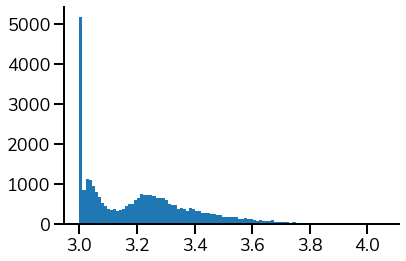

In [28]:
plt.hist(np.log10(selectedPeaks["length"]),bins=100);

In [29]:
min(selectedPeaks["length"])

1000

In [30]:
max(selectedPeaks["length"])

11400

---

In [31]:
genes = pd.read_csv("../../results/files/mm9.genes.info.csv")
# genes = genes.drop_duplicates(subset=["gene_name"])
genes["gene_len"] = abs(genes.end - genes.start)
# genes = genes.rename(columns={"gene_name":"gene_name_"})

In [32]:
genes

,chrom,start,end,gene_name,strand,gene_len
0,chr1,3044314,3044814,Gm16088,+,500
1,chr1,3092097,3092206,U6,+,109
2,chr1,3195982,3661579,Xkr4,-,465597
3,chr1,3456668,3503634,Gm1992,+,46966
4,chr1,3668961,3669024,U7,-,63
...,...,...,...,...,...,...
37578,chrY,2086590,2097768,Rbmy1a1,+,11178
37579,chrY,2118049,2129045,Gm10256,+,10996
37580,chrY,2156899,2168120,Gm10352,+,11221
37581,chrY,2390390,2398856,Gm3376,+,8466


In [33]:
tssRegion = PeaksManipulation.GetTSS(genes)

In [34]:
tssRegion

,chrom,start,end,gene_name,strand,gene_len
0,chr1,3044264,3044364,Gm16088,+,500
1,chr1,3092047,3092147,U6,+,109
2,chr1,3661529,3661629,Xkr4,-,465597
3,chr1,3456618,3456718,Gm1992,+,46966
4,chr1,3668974,3669074,U7,-,63
...,...,...,...,...,...,...
37525,chrY,2086540,2086640,Rbmy1a1,+,11178
37526,chrY,2117999,2118099,Gm10256,+,10996
37527,chrY,2156849,2156949,Gm10352,+,11221
37528,chrY,2390340,2390440,Gm3376,+,8466


In [40]:
tssOverlap = bf.closest(selectedPeaks,tssRegion)

In [36]:
promoterPeaks = tssOverlap.query("distance <= 100",engine="python").drop_duplicates(subset=["chrom","start","end"])

In [37]:
promoterPeaks

,chrom,start,end,length,chrom_,start_,end_,gene_name_,strand_,gene_len_,distance
1,chr1,4774336,4776623,2287,chr1,4775770,4775870,Mrpl15,-,12533,0
4,chr1,7077974,7079799,1825,chr1,7078951,7079051,Pcmtd1,+,84706,0
6,chr1,7386778,7389174,2396,chr1,7387832,7387932,Gm16899,-,48395,0
9,chr1,9534577,9536304,1727,chr1,9535439,9535539,Rrs1,+,2046,0
14,chr1,9689154,9691474,2320,chr1,9690240,9690340,Mybl1,-,32794,0
...,...,...,...,...,...,...,...,...,...,...,...
32169,chrX,155809856,155811271,1415,chrX,155810060,155810160,Eif1ax,+,17750,0
32170,chrX,156064631,156066938,2307,chrX,156065154,156065254,Sh3kbp1,+,350797,0
32178,chrX,160395856,160397466,1610,chrX,160396543,160396643,Zrsr2,-,23218,0
32179,chrX,160857433,160858497,1064,chrX,160857675,160857775,Piga,+,14123,0


In [39]:
geneOverlap = bf.closest(selectedPeaks,genes)

In [41]:
geneOverlap

,chrom,start,end,length,chrom_,start_,end_,gene_name_,strand_,gene_len_,distance
0,chr1,4764434,4765434,1000,chr1,4763287,4775820,Mrpl15,-,12533,0
1,chr1,4774336,4776623,2287,chr1,4763287,4775820,Mrpl15,-,12533,0
2,chr1,6252316,6254087,1771,chr1,6196278,6266729,Rb1cc1,+,70451,0
3,chr1,7066405,7069093,2688,chr1,7079001,7163707,Pcmtd1,+,84706,9908
4,chr1,7077974,7079799,1825,chr1,7079001,7163707,Pcmtd1,+,84706,0
...,...,...,...,...,...,...,...,...,...,...,...
32182,chrX,163646083,163650823,4740,chrX,163645025,163647247,Tmsb4x,-,2222,0
32183,chrX,163753282,163754685,1403,chrX,163742861,163768490,Tlr7,-,25629,0
32184,chrX,163819778,163820889,1111,chrX,163784254,163820681,Prps2,-,36427,0
32185,chrX,166318177,166319177,1000,chrX,166123129,166443668,Mid1,+,320539,0


In [42]:
enhancerPeaks = geneOverlap.query("distance > 5000",engine="python").drop_duplicates(subset=["chrom","start","end"])

In [43]:
enhancerPeaks

,chrom,start,end,length,chrom_,start_,end_,gene_name_,strand_,gene_len_,distance
3,chr1,7066405,7069093,2688,chr1,7079001,7163707,Pcmtd1,+,84706,9908
13,chr1,9628528,9630162,1634,chr1,9550913,9621256,2610203C22Rik,-,70343,7272
28,chr1,12992303,12993303,1000,chr1,12856630,12981258,Slco5a1,-,124628,11045
29,chr1,13041947,13043066,1119,chr1,13103538,13117244,Prdm14,-,13706,60472
40,chr1,13372758,13374812,2054,chr1,13129186,13364164,Ncoa2,-,234978,8594
...,...,...,...,...,...,...,...,...,...,...,...
32151,chrX,104521528,104522808,1280,chrX,104539925,104540951,Gm14833,+,1026,17117
32155,chrX,127278779,127279808,1029,chrX,127422205,127422314,AL671906.1,-,109,142397
32165,chrX,147391191,147392191,1000,chrX,147417684,147451865,Gnl3l,-,34181,25493
32177,chrX,160317270,160318401,1131,chrX,160346949,160371598,Ap1s2,+,24649,28548


In [44]:
promoterPeaks.to_csv("promoter_peaks_using_h3k27ac.tsv",index=False,sep="\t")
enhancerPeaks.to_csv("enhancer_peaks_using_h3k27ac.tsv",index=False,sep="\t")